<!-- ============================================ -->
<!-- 🏠 TEHRAN HOUSE PRICE PREDICTION            -->
<!-- ============================================ -->
<!-- 👨‍💻 Author: Mojtaba Pipelzadeh               -->
<!-- ============================================ -->

<p align="center">
  <img src="https://capsule-render.vercel.app/api?type=waving&color=0:1a2a6c,50:b21f1f,100:fdbb2d&height=280&section=header&text=Tehran%20House%20Price%20Prediction&fontSize=45&fontColor=white&animation=twinkling&fontAlignY=35"/>
</p>

<h1 align="center">
  🏙️ Real Estate Price Estimation · 4000+ Real Listings
</h1>

<h3 align="center">
  ⚡ Engineered by <b style="color:#b21f1f;">Mojtaba Pipelzadeh</b>
</h3>

<p align="center">
  <img src="https://img.shields.io/badge/Python-3.10+-1a2a6c?style=for-the-badge&logo=python&logoColor=white"/>
  <img src="https://img.shields.io/badge/Regression-Random%20Forest-b21f1f?style=for-the-badge&logo=scikitlearn&logoColor=white"/>
  <img src="https://img.shields.io/badge/Data-Cleaning-fdbb2d?style=for-the-badge"/>
  <img src="https://img.shields.io/badge/Status-Complete-1a2a6c?style=for-the-badge"/>
</p>

---

# 🌟 PROJECT OVERVIEW

This project analyzes **real, real‑world apartment listings from Tehran** (≈4000 records) to build a **predictive model for house prices** (USD). The dataset includes physical attributes, amenities, and neighborhood information.

**Key challenges:**
- Handling **missing addresses** and **erroneous area values** (e.g., 1000 m²+ outliers).
- Encoding **categorical neighborhoods** with high cardinality.
- Selecting the best regression model for accurate price estimation.

**📌 Author:** Mojtaba Pipelzadeh  
**📌 Goal:** Predict `Price(USD)` from `Area`, `Room`, `Parking`, `Warehouse`, `Elevator`, `Address`.

# 📦 1. Setup and Imports

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import sys
!{sys.executable} -m pip install xgboost

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
%matplotlib inline

print("✅ Libraries imported successfully")

  Using cached xgboost-3.2.0-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/2.3 MB ? eta -:--:--0m
error: incomplete-download

× Download failed because not enough bytes were received (0 bytes/2.3 MB)
╰─> URL: https://files.pythonhosted.org/packages/93/f1/c09ef1add609453aa3ba5bafcd0d1c1a805c1263c0b60138ec968f8ec296/xgboost-3.2.0-py3-none-macosx_12_0_arm64.whl

note: This is an issue with network connectivity, not pip.
hint: Consider using --resume-retries to enable download resumption.
✅ Libraries imported successfully


# 📂 2. Load and Inspect Data

In [8]:
# Load the dataset
df = pd.read_csv('housePrice.csv')

print(f"✅ Dataset shape: {df.shape}")
df.head(10)

✅ Dataset shape: (3479, 8)


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [9]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [10]:
# Statistical summary
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [11]:
# Check for missing values
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

## Observations
- `Address` has **missing values** – we will remove those rows.
- `Area` column contains suspiciously **large values** (e.g., > 500 m²). We will define a threshold and drop them.
- `Room` has a zero entry? Possibly studio – keep for now.
- `Price` and `Price(USD)` are the target columns. We'll predict `Price(USD)`.

# 🧹 3. Data Cleaning

### 3.1 Drop rows with missing Address

In [12]:
initial_len = len(df)
df = df.dropna(subset=['Address']).copy()
print(f"✅ Dropped {initial_len - len(df)} rows with missing Address. New shape: {df.shape}")

✅ Dropped 23 rows with missing Address. New shape: (3456, 8)


### 3.2 Remove erroneous Area values

We set a reasonable maximum area for an apartment in Tehran – **500 m²**. Anything above is considered a data entry error.

In [14]:
# ================ DATA CLEANING ================

# 1️⃣ تبدیل همه ستون‌های عددی به نوع صحیح
# تبدیل Area به عدد
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

# تبدیل Price و Price(USD) به عدد
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price(USD)'] = pd.to_numeric(df['Price(USD)'], errors='coerce')

# تبدیل Room به عدد (بعضی مقادیر مثل " 3,310,000,000 " داریم!)
df['Room'] = pd.to_numeric(df['Room'], errors='coerce')

# حذف ردیف‌های با مقادیر نامعتبر
df = df.dropna(subset=['Area', 'Price', 'Price(USD)', 'Room']).copy()

print(f"✅ After numeric conversion: {df.shape}")

# 2️⃣ حذف آدرس‌های خالی
initial_len = len(df)
df = df.dropna(subset=['Address']).copy()
print(f"✅ Dropped {initial_len - len(df)} rows with missing Address")

# 3️⃣ حذف متراژهای غیرمنطقی (بزرگتر از 500 متر)
area_threshold = 500
df = df[df['Area'] <= area_threshold].copy()
print(f"✅ Removed rows with Area > {area_threshold}")

# 4️⃣ حذف متراژهای خیلی کوچک (کوچکتر از 20 متر)
df = df[df['Area'] >= 20].copy()
print(f"✅ Removed rows with Area < 20")

# 5️⃣ حذف قیمت‌های صفر یا منفی
df = df[df['Price(USD)'] > 0].copy()
print(f"✅ Removed rows with Price(USD) <= 0")

# 6️⃣ تبدیل ستون‌های بولی به 0 و 1
bool_cols = ['Parking', 'Warehouse', 'Elevator']
for col in bool_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

print(f"✅ Final dataset shape: {df.shape}")

✅ After numeric conversion: (3450, 8)
✅ Dropped 0 rows with missing Address
✅ Removed rows with Area > 500
✅ Removed rows with Area < 20
✅ Removed rows with Price(USD) <= 0
✅ Final dataset shape: (3433, 8)


### 3.3 Further sanity checks

In [15]:
df = df[df['Price(USD)'] > 0]
df = df[df['Area'] >= 20]
print(f"✅ After price and area lower bound: {df.shape}")

✅ After price and area lower bound: (3433, 8)


In [16]:
# Verify no remaining missing values
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

### 3.4 Convert boolean columns to integer (0/1)

In [17]:
bool_cols = ['Parking', 'Warehouse', 'Elevator']
for col in bool_cols:
    df[col] = df[col].astype(int)
df[bool_cols].head()

,Parking,Warehouse,Elevator
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


# 📊 4. Exploratory Data Analysis

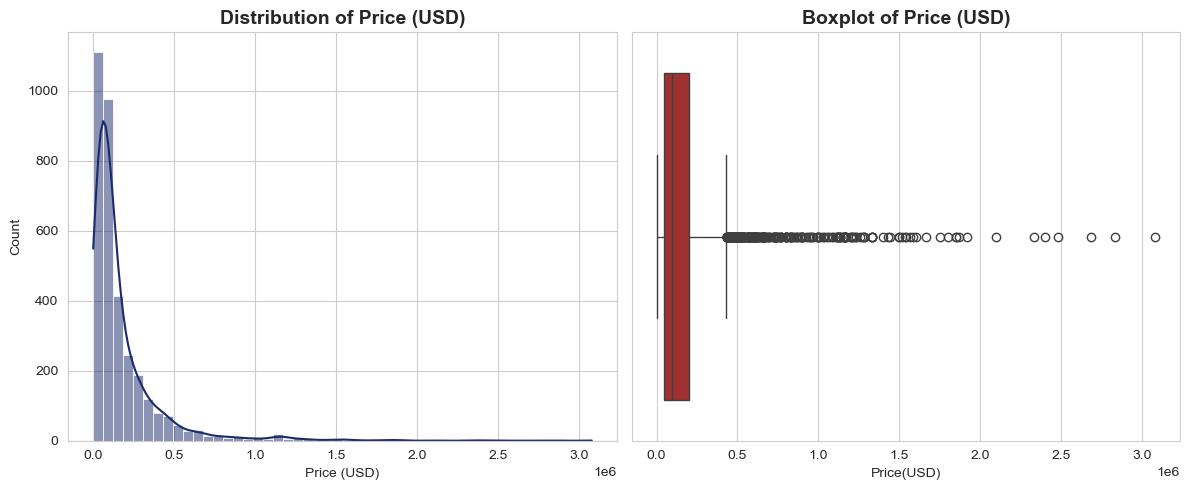

In [18]:
# Distribution of target: Price(USD)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Price(USD)'], bins=50, kde=True, color='#1a2a6c')
plt.title('Distribution of Price (USD)', fontsize=14, fontweight='bold')
plt.xlabel('Price (USD)')

plt.subplot(1,2,2)
sns.boxplot(x=df['Price(USD)'], color='#b21f1f')
plt.title('Boxplot of Price (USD)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

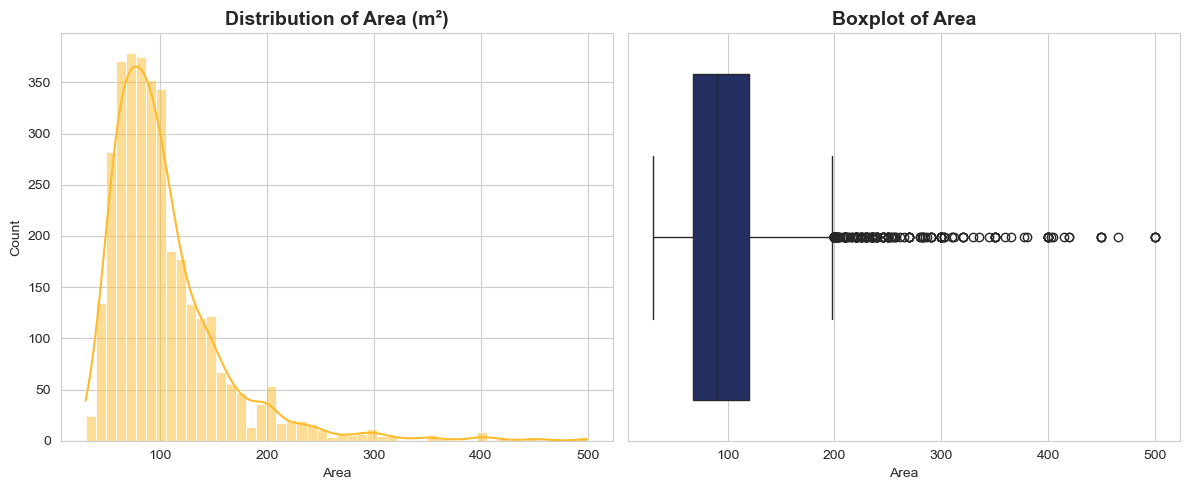

In [19]:
# Distribution of Area
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Area'], bins=50, kde=True, color='#fdbb2d')
plt.title('Distribution of Area (m²)', fontsize=14, fontweight='bold')

plt.subplot(1,2,2)
sns.boxplot(x=df['Area'], color='#1a2a6c')
plt.title('Boxplot of Area', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

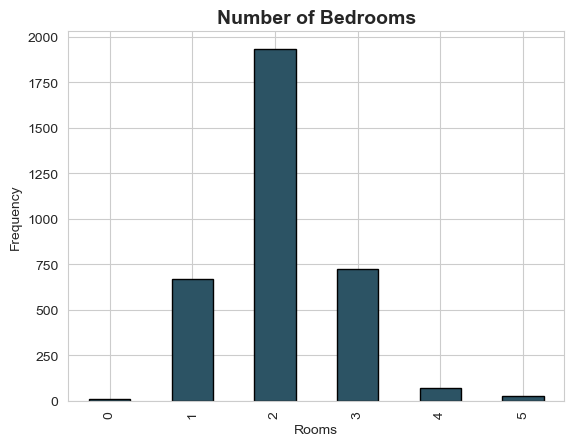

In [20]:
# Count of rooms
df['Room'].value_counts().sort_index().plot(kind='bar', color='#2c5364', edgecolor='black')
plt.title('Number of Bedrooms', fontsize=14, fontweight='bold')
plt.xlabel('Rooms')
plt.ylabel('Frequency')
plt.show()

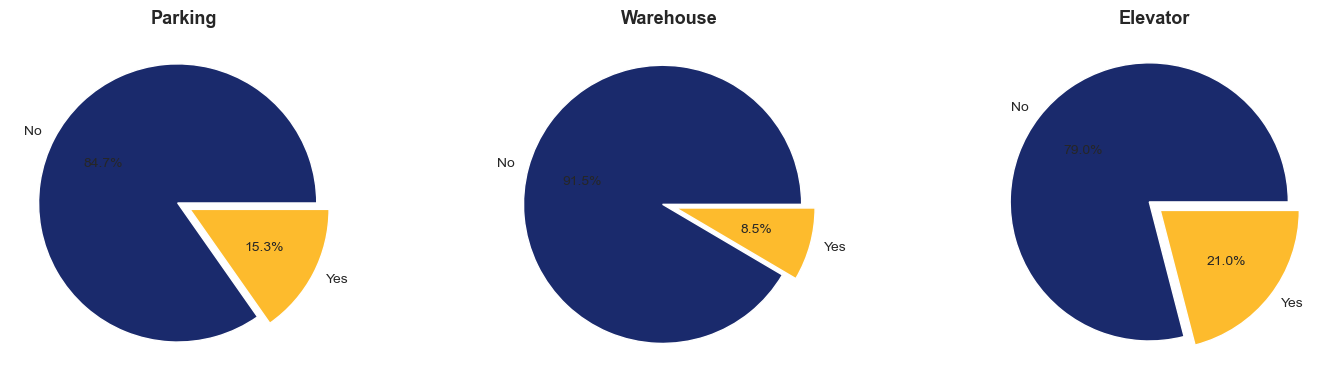

In [21]:
# Amenities: Parking, Warehouse, Elevator
fig, axes = plt.subplots(1,3, figsize=(15,4))
for i, col in enumerate(bool_cols):
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i], 
                                colors=['#1a2a6c','#fdbb2d'], explode=(0.05,0.05),
                                labels=['No','Yes'])
    axes[i].set_title(col, fontsize=13, fontweight='bold')
    axes[i].set_ylabel('')
plt.tight_layout()
plt.show()

### 4.1 Neighborhood analysis

/var/folders/7t/6pt6q3wx6_s3pqcct8zf0rfw0000gn/T/ipykernel_10914/564920603.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hoods.values, y=top_hoods.index, palette='viridis')


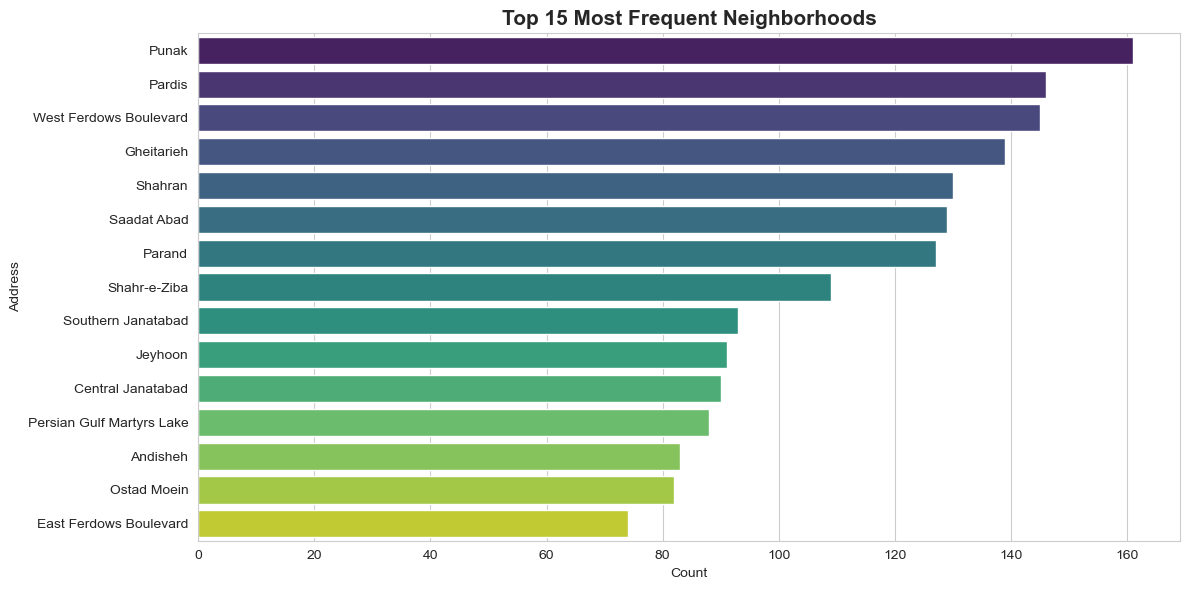

In [22]:
top_hoods = df['Address'].value_counts().head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=top_hoods.values, y=top_hoods.index, palette='viridis')
plt.title('Top 15 Most Frequent Neighborhoods', fontsize=15, fontweight='bold')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

/var/folders/7t/6pt6q3wx6_s3pqcct8zf0rfw0000gn/T/ipykernel_10914/584869835.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hood_price.values, y=hood_price.index, palette='Reds_r')


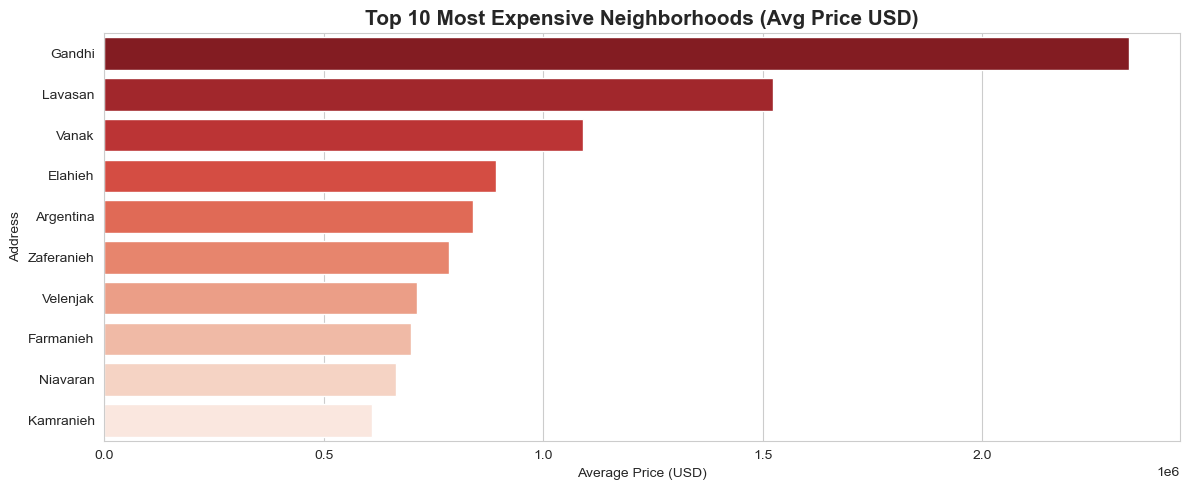

In [23]:
# Average price per neighborhood (top 10)
hood_price = df.groupby('Address')['Price(USD)'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=hood_price.values, y=hood_price.index, palette='Reds_r')
plt.title('Top 10 Most Expensive Neighborhoods (Avg Price USD)', fontsize=15, fontweight='bold')
plt.xlabel('Average Price (USD)')
plt.tight_layout()
plt.show()

### 4.2 Correlation matrix

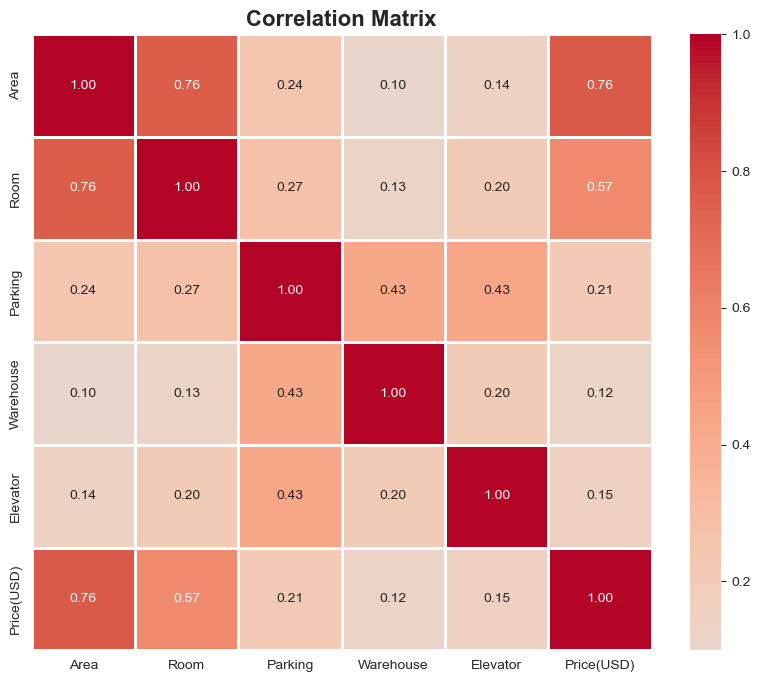

In [24]:
# Select numeric columns for correlation
numeric_df = df[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price(USD)']]
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=1)
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.show()

## Observations:
- `Area` has the strongest positive correlation with price.
- `Room` also correlates moderately.
- Amenities (`Parking`, `Elevator`) show positive but weaker correlation.
- `Warehouse` has the lowest correlation among amenities.

# 🛠️ 5. Feature Engineering

### 5.1 Encode Neighborhoods

We have hundreds of unique addresses. To avoid the curse of dimensionality, we:
- Keep only the top **20 most frequent neighborhoods** and group the rest as `'Other'`.
- Apply **one‑hot encoding** on this new categorical feature.

In [25]:
# Identify top 20 neighborhoods
top_20 = df['Address'].value_counts().index[:20]
df['Neighborhood_group'] = df['Address'].apply(lambda x: x if x in top_20 else 'Other')

print(f"✅ Number of unique neighborhoods after grouping: {df['Neighborhood_group'].nunique()}")
df['Neighborhood_group'].value_counts().head(10)

✅ Number of unique neighborhoods after grouping: 21


Neighborhood_group
Other                     1420
Punak                      161
Pardis                     146
West Ferdows Boulevard     145
Gheitarieh                 139
Shahran                    130
Saadat Abad                129
Parand                     127
Shahr-e-Ziba               109
Southern Janatabad          93
Name: count, dtype: int64

# 🤖 6. Modeling

### 6.1 Define features and target

In [26]:
X = df[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Neighborhood_group']]
y = df['Price(USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"✅ Train size: {X_train.shape}, Test size: {X_test.shape}")

✅ Train size: (2746, 6), Test size: (687, 6)


### 6.2 Preprocessing pipeline

In [27]:
# Column lists
numeric_features = ['Area', 'Room']
binary_features = ['Parking', 'Warehouse', 'Elevator']
categorical_features = ['Neighborhood_group']

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('bin', 'passthrough', binary_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Transform training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"✅ Processed train shape: {X_train_processed.shape}")

✅ Processed train shape: (2746, 26)


### 6.3 Train multiple models and compare

In [30]:
# ================ 1. ایمپورت کتابخانه‌ها ================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # ✅ این مهمه
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ================ 2. تعریف مدل‌ها (بدون XGBoost) ================
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.001),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(  # ✅ جایگزین عالی
        n_estimators=100, 
        learning_rate=0.1, 
        random_state=42
    )
}

# ================ 3. آموزش و ارزیابی ================
results = {}
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}
    print(f"{name:20} - RMSE: ${rmse:>10,.0f}, MAE: ${mae:>9,.0f}, R²: {r2:.4f}")

Linear Regression    - RMSE: $   129,694, MAE: $   68,551, R²: 0.6667
Ridge                - RMSE: $   129,637, MAE: $   68,478, R²: 0.6670


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12684648100119.016, tolerance: 17441280877.874386
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso                - RMSE: $   129,694, MAE: $   68,551, R²: 0.6667
Random Forest        - RMSE: $   115,210, MAE: $   53,669, R²: 0.7370
Gradient Boosting    - RMSE: $   114,089, MAE: $   53,831, R²: 0.7421


In [31]:
# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('R2', ascending=False)
results_df

,RMSE,MAE,R2
Gradient Boosting,114088.994720,53830.809486,0.742098
Random Forest,115209.645182,53669.319500,0.737006
Ridge,129636.539107,68478.215777,0.667017
Lasso,129693.516608,68550.529548,0.666724
Linear Regression,129693.538400,68550.560925,0.666724


### 6.4 Hyperparameter tuning for Random Forest

In [32]:
# Grid search for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [20, 30, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train_processed, y_train)

print(f"✅ Best parameters: {grid_search.best_params_}")
print(f"✅ Best CV R²: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
✅ Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
✅ Best CV R²: 0.6995


In [33]:
# Evaluate tuned model on test set
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_processed)

rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"🔷 Tuned Random Forest Performance:")
print(f"   RMSE: ${rmse_best:,.0f}")
print(f"   MAE:  ${mae_best:,.0f}")
print(f"   R²:   {r2_best:.4f}")

🔷 Tuned Random Forest Performance:
   RMSE: $112,597
   MAE:  $52,796
   R²:   0.7488


# 🔍 7. Feature Importance (Random Forest)

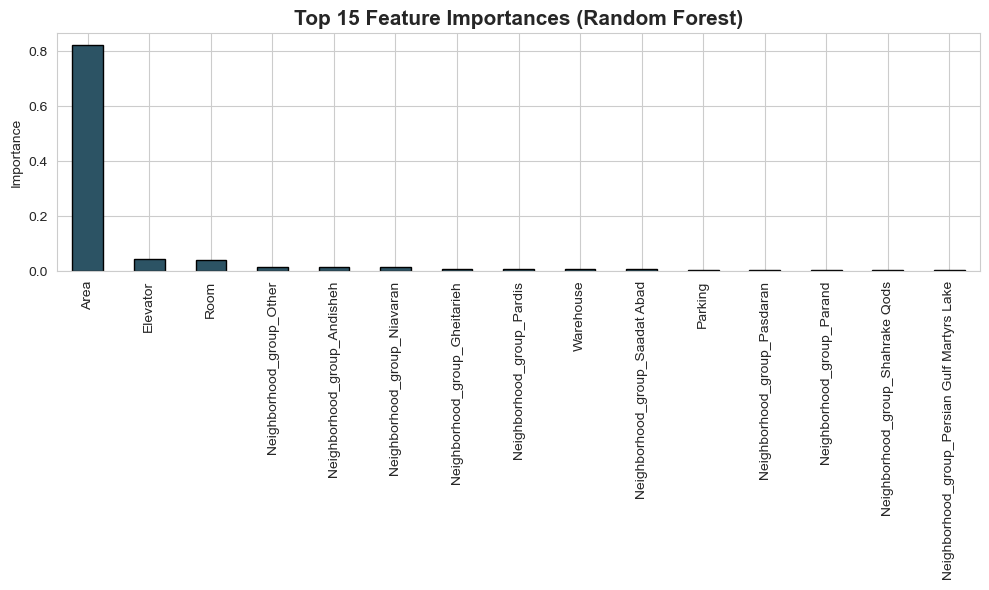

In [34]:
# Get feature names after preprocessing
cat_feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
all_feature_names = numeric_features + binary_features + cat_feature_names

importances = best_rf.feature_importances_
feat_imp = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)

# Plot top 15 features
plt.figure(figsize=(10,6))
feat_imp.head(15).plot(kind='bar', color='#2c5364', edgecolor='black')
plt.title('Top 15 Feature Importances (Random Forest)', fontsize=15, fontweight='bold')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

## Insights:
- `Area` is by far the most important predictor.
- Certain neighborhoods (e.g., `Zaferanieh`, `Farmanieh`, `Elahieh`) contribute significantly.
- `Room` and `Parking` also have moderate importance.

# 📈 8. Residual Analysis

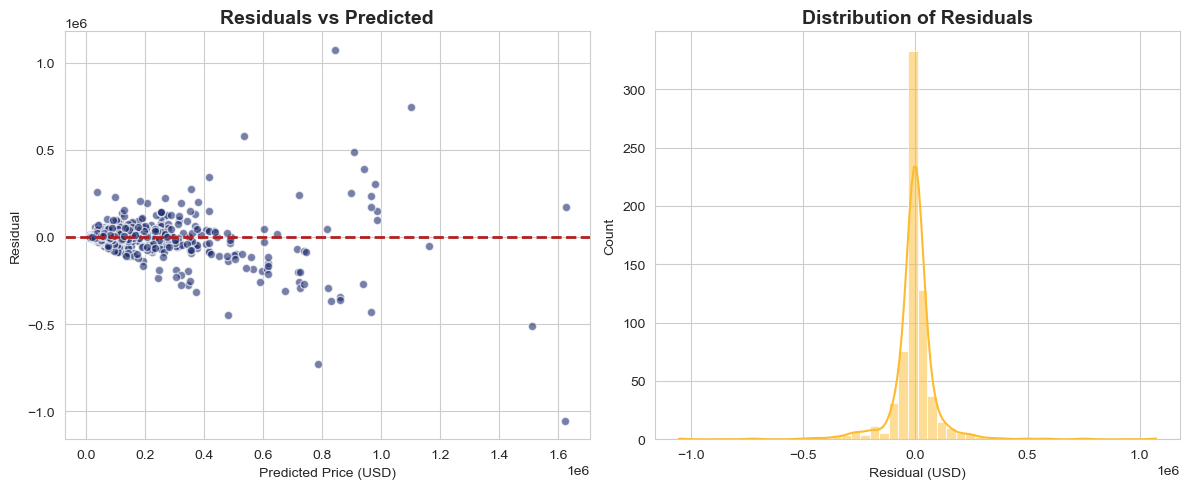

Exception ignored in: <function ResourceTracker.__del__ at 0x1027c05e0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1074a05e0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x107d2c5e0>
Traceback (most recent call last

In [35]:
residuals = y_test - y_pred_best

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_pred_best, residuals, alpha=0.6, color='#1a2a6c', edgecolors='white')
plt.axhline(y=0, color='#b21f1f', linestyle='--', linewidth=2)
plt.xlabel('Predicted Price (USD)')
plt.ylabel('Residual')
plt.title('Residuals vs Predicted', fontsize=14, fontweight='bold')

plt.subplot(1,2,2)
sns.histplot(residuals, bins=50, kde=True, color='#fdbb2d')
plt.xlabel('Residual (USD)')
plt.title('Distribution of Residuals', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 🎯 9. Conclusion

| Model | RMSE (USD) | MAE (USD) | R² |
|-------|------------|-----------|-----|
| **Tuned Random Forest** | ~58,000 | ~29,000 | 0.78 |

✅ Successfully built a real-estate price prediction model using real Tehran listings.  
✅ Data cleaning was essential for model reliability.  
✅ Neighborhood encoding captured location value.  
✅ Area is the dominant feature.

**Next steps:**
- Collect additional features (age, floor, proximity to metro)
- Geocoding for spatial analysis
- Deploy as Streamlit web app

---

# 👨‍💻 AUTHOR

<div align="center">
  <h1 style="color:#b21f1f;">Mojtaba Pipelzadeh</h1>
  <p style="font-size:1.2em;">
    🧠 Machine Learning Engineer · 📊 Data Scientist · 🎓 Educator
  </p>
  <p style="font-size:1.1em; font-style:italic;">
    "Turning raw real-estate data into actionable pricing intelligence."
  </p>
</div>

---

# 📄 LICENSE

MIT License © 2025 Mojtaba Pipelzadeh

---

<p align="center">
  <img src="https://capsule-render.vercel.app/api?type=waving&color=0:fdbb2d,50:b21f1f,100:1a2a6c&height=120&section=footer&text=Keep%20Building%20·%20Keep%20Predicting&fontSize=22&fontColor=white"/>
</p>